In [1]:
import matplotlib.pyplot as plt
from itertools import islice
from src.plot_handler import GridPaint
from src.navigator.grid2d import Grid2dNavigator
from src.env_setter import EnvSetter


width, height, num_obst = 100, 100, 2000
start, goal = (0,0), (width-1, height-1)
start_color, end_color = (0.2,0.7,0.1), (1,0,0)

env_setter = EnvSetter(width, height)
navigator = Grid2dNavigator(width, height)

In [2]:
# 장애물 정의
obstacles = env_setter.get_obstacles(black_list={start, goal})
obstacles = islice(obstacles, num_obst)
obstacles = list(obstacles)
navigator.set_obstacles(obstacles)

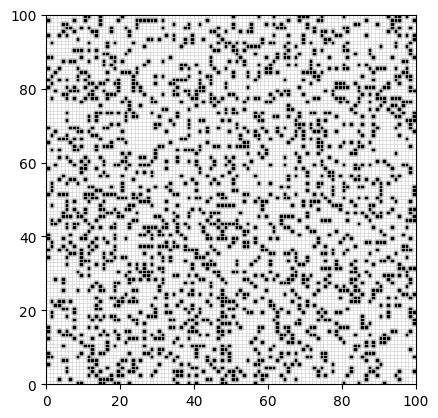

In [3]:
# 그래프 그리기
grid_paint = GridPaint()
fig, ax = grid_paint.plot_map(width, height)
for obstacle in obstacles:
    grid_paint.add_obstacle(obstacle)
plt.show()

In [4]:
def new_heuristic(node, target):
    """예상 이동경로 점수. 해당 점수를 기반으로 가장 근접했던 경로를 계산
    """
    (a, b), (x, y) = node, target
    # Manhattan 거리
    return ( (x - a)**2 + (y - b)**2 )**0.5 * 12

navigator.heuristic = new_heuristic

In [5]:
# 경로 계산
traces = navigator.get_path(start, goal)


cnt: 280
distance: 199


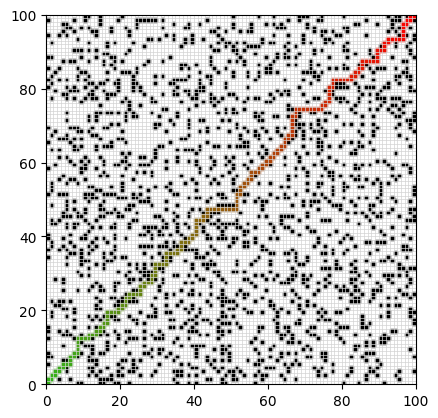

In [6]:
# 그래프 그리기
grid_paint = GridPaint()
fig, ax = grid_paint.plot_map(width, height)
for obstacle in obstacles:
    grid_paint.add_obstacle(obstacle)
color_map = grid_paint.generate_gradient(start_color, end_color, len(traces))
for trace, color in zip(traces, color_map):
    grid_paint.add_point(trace, color)
plt.show()
